In [92]:
import matplotlib.pyplot as plt # to make plots
import numpy as np # for array manipulation and math functions
import scipy.signal as scs # for signal analysis
import glob # for finding files
import os as os
import warnings
import array as arr
from scipy import optimize
from scipy.optimize import curve_fit
# import fit models from the lmfit package
from lmfit.models import ExponentialModel, GaussianModel, PolynomialModel

path2='../Versuch 526/Rohdaten/Tag 2/'
path1='../Versuch 526/Rohdaten/'
path_gaus='./gaus/'
path_raw='./raw/'
winkel=[]
for h in range(0,18):
    winkel.append(h*5+35)
def E_kal(kanal,m,b):
    return m*kanal+b

def Effizienz(E,A,B,C,D):
    # return (P1+P2*np.log(E)+P4*np.log(E)**3+P5*np.log(E)**4    +P3*np.log(E)**2)/E
    return A-B*np.exp(C*(E+D))
def Gausfit_1(x,y,namena,amplitude,center,sigma,dont_show):
    x1 = x
    y1 = y
    model = (GaussianModel(prefix='g1_'))
    params = model.make_params(g1_amplitude=amplitude,
                            g1_center=center,
                            g1_sigma=sigma)
    result = model.fit(y1, params, x=x1)
    # print(result.fit_report(min_correl=0.5))
    lolo1=[]
    lala1=[]
    for name,param in result.params.items():
        if result.errorbars==True:
            lala1.append(param.stderr)
        else:
            lala1.append(0)
        lolo1.append(param.value)
    comps = result.eval_components(x=x1)
    dely = result.eval_uncertainty(sigma=3)
    ergebnis = model.eval(params,x=x1)
    figure=plt.figure(figsize=(6,6))
    plt.title('Gaußkurvenfit an das korrigierte Natriumspektrum\n des linken Detektors',fontsize=15)
    plt.plot(x1,y1,"b-",linewidth=.2,label="Messwerte",)
    plt.plot(x1,result.best_fit,"r-",label="Gaußkurve",)
    plt.xlabel('Kanal',fontsize=12)
    plt.ylabel('Zählrate',fontsize=12)
    plt.grid()
    plt.legend(fontsize=12)
    plt.savefig(namena+'.png')
    if (dont_show==1):
        plt.close(figure)
    #plt.show
    return lolo1,lala1

def Gausfit_11(x,y,amplitude,center,sigma):
    x1 = x
    y1 = y
    model = (GaussianModel(prefix='g1_'))
    params = model.make_params(g1_amplitude=amplitude,
                            g1_center=center,
                            g1_sigma=sigma)
    result = model.fit(y1, params, x=x1)
    #print(result.fit_report(min_correl=0.5))
    lolo1=[]
    lala1=[]
    for name,param in result.params.items():
        if result.errorbars==True:
            lala1.append(param.stderr)
        else:
            lala1.append(0)
        lolo1.append(param.value)
    comps = result.eval_components(x=x1)
    dely = result.eval_uncertainty(sigma=3)
    ergebnis = model.eval(params,x=x1)
    return lolo1,lala1,result.best_fit

def Gausfit_2(x,y,amplitude,center,sigma):
    x1 = x
    y1 = y
    model = (GaussianModel(prefix='g1_') +
             GaussianModel(prefix='g2_'))
    params = model.make_params(g1_amplitude=amplitude,
                            g1_center=center,
                            g1_sigma=sigma,
                            g2_amplitude=amplitude,
                            g2_center=center,
                            g2_sigma=sigma)
    result = model.fit(y1, params, x=x1)
    print(result.fit_report(min_correl=0.5))
    lolo1=[]
    lala1=[]
    for name,param in result.params.items():
        if result.errorbars==True:
            lala1.append(param.stderr)
        else:
            lala1.append(0)
        lolo1.append(param.value)
    comps = result.eval_components(x=x1)
    dely = result.eval_uncertainty(sigma=3)
    ergebnis = model.eval(params,x=x1)
    return lolo1,lala1,result.best_fit

def Plot_raw(K,Kbg,I,Ibg,name,path,dont_show_and_save):
    figure=plt.figure(figsize=(10,6))
    plt.title('Ausgeschnittene 511keV Linie des Na-Spektrums\n des linken Detektors',fontsize=15)
    plt.plot(K,I,"b")
    plt.plot(Kbg,Ibg,'r')
    plt.xlabel('Kanal',fontsize=12)
    plt.ylabel('Zählrate',fontsize=12)
    plt.grid()
    if dont_show_and_save==1:
        plt.savefig(path+str(name)+'.png')
        plt.close(figure)
    return 0

def Gauskurvenauswertung(winkel,ext,bg_ext,path,raw_path,gaus_path,show,amplitude,center,sigma):
    data=np.loadtxt(path+str(winkel)+ext)
    data_bg=np.loadtxt(path+str(winkel)+bg_ext)
    kanal=E_kal(data[:,0],1,1)
    kanal_bg=E_kal(data_bg[:,0],1,1)
    zahl=data[:,1]
    zahl_bg=data_bg[:,1]
    Plot_raw(kanal,kanal_bg,zahl,zahl_bg,str(winkel)+'bg',raw_path,1)
    par,stderr=Gausfit_1(kanal,zahl-zahl_bg,gaus_path+str(winkel)+'gaus',amplitude,center,sigma,show)
    return par,stderr

def Gradenfit(x,y):
    anpassungs_werte, co_var = curve_fit(E_kal,x,y)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x:
        Rfit.append(E_kal(E, *anpassungs_werte))
    return Rfit

def Fit(x,y,s,funktion):
    anpassungs_werte, co_var = curve_fit(funktion,x,y,p0=s)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x:
        Rfit.append(funktion(E, *anpassungs_werte))
    return Rfit

def Fit_smooth(x,y,x_smooth,s,funktion):
    anpassungs_werte, co_var = curve_fit(funktion,x,y,p0=s)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x_smooth:
        Rfit.append(funktion(E, *anpassungs_werte))
    return Rfit

In [2]:
i=0
params=[]
params_stderr=[]
amp=[]
step=(3500-1200)/17
for w in winkel:
    amp.append(3500-step*i)
    a1,a2=Gauskurvenauswertung(w,'.txt','b.txt',path2,path_raw,path_gaus,1,10000,amp[i],400)
    params.append(a1)
    params_stderr.append(a2)
    i=i+1
print(params)
    



c:\Users\Banton\anaconda3\Lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


[[16837.474715145338, 3312.0101680875164, 213.13312273763597, 501.89014008503995, 31.516363119779772], [15619.886024344973, 3138.5481832530472, 215.90029759517176, 508.4063387830624, 28.862550564772334], [14070.668606809057, 2967.902064058473, 201.63932642611377, 474.82431865474126, 27.838740567282645], [12574.48330370727, 2813.391353278249, 193.15704915406891, 454.8500824889846, 25.9710598834591], [11807.785371079352, 2660.3242018356946, 186.66548179743572, 439.5636098462376, 25.235651543527432], [10829.46464902233, 2508.4136208535497, 178.95894209218062, 421.4160960175088, 24.14146778217031], [9949.871824845572, 2369.681841080035, 165.30656474186742, 389.2672047854443, 24.012505230554513], [9845.779043819188, 2244.0473652237783, 165.69329996773294, 390.1778966300169, 23.70583323404112], [8607.333577694491, 2130.5206442871126, 150.28796956913484, 353.9011165007901, 22.84833219982424], [8203.966105867805, 2025.4156568571836, 147.734905917814, 347.88911115338675, 22.153932322654263], [7

In [3]:
allfiles=glob.glob(path1+'*.txt')
print(allfiles)
chanel=[]
count=[]
x_=[]
y_=[]
i=0
for h in allfiles:
    data=np.loadtxt(h)
    chanel.append(data[:,0])
    count.append(data[:,1])
    mask=((chanel[i]>3600))
    x_.append(chanel[i][mask])
    y_.append(count[i][mask])
    i=i+1
print(x_[1][1])

['../Versuch 526/Rohdaten\\Cs10,18mm.txt', '../Versuch 526/Rohdaten\\Cs1mm.txt', '../Versuch 526/Rohdaten\\Cs20,2mm.txt', '../Versuch 526/Rohdaten\\Cs5,06mm.txt', '../Versuch 526/Rohdaten\\CsHintergrundTot.txt', '../Versuch 526/Rohdaten\\CsSpektrum.txt']
3602.0


['../Versuch 526/Rohdaten/Tag 2\\EuBackground.txt', '../Versuch 526/Rohdaten/Tag 2\\EuMessung.txt']
[34119.9906010795, 285.77565520978595, 24.809464216074552, 58.42182252529668, 548.6578592678196]
[20160.634712429568, 820.1360461309811, 42.3392996645685, 99.7014296361192, 189.96369910122036]
[9419.710813624431, 1588.1959405779478, 112.4238626883328, 264.73796033573984, 33.42636525254522]
[18329.842153504513, 2203.331323810121, 110.71943093827898, 260.7243303620781, 66.04576383193711]
[7553.64057014588, 4849.3606589496485, 207.8777635838958, 489.51471524262956, 14.496340014794928]
[5391.996081134263, 5957.182788336699, 210.15361080243756, 494.87392578979603, 10.235823738574274]
[6632.153546114488, 6779.225255354168, 222.21850619884825, 523.2845827671719, 11.906508755272082]
[285.77565520978595, 820.1360461309811, 1588.1959405779478, 2203.331323810121, 4849.3606589496485, 5957.182788336699, 6779.225255354168, 4177.944999253275]
[[34119.9906010795, 285.77565520978595, 24.809464216074552, 

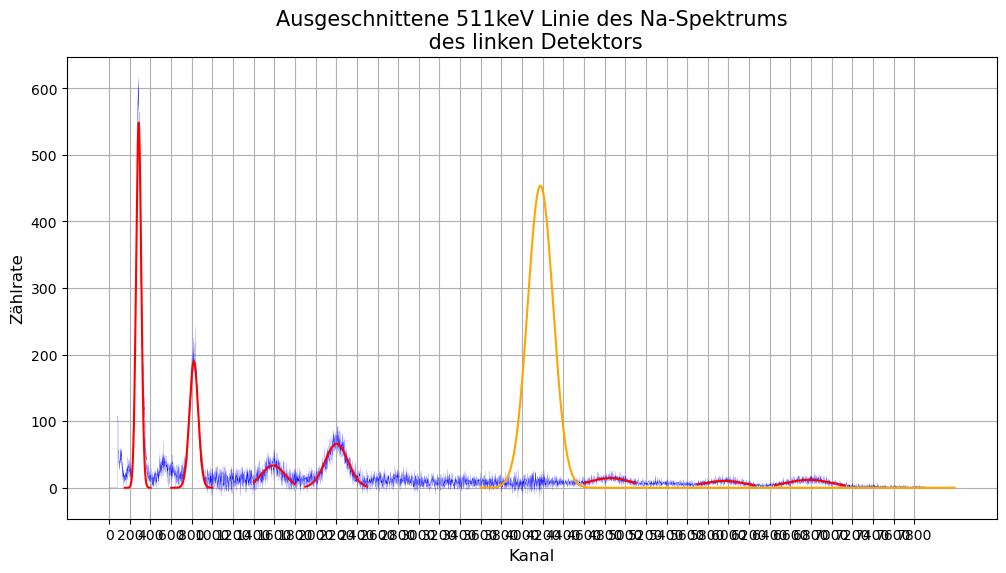

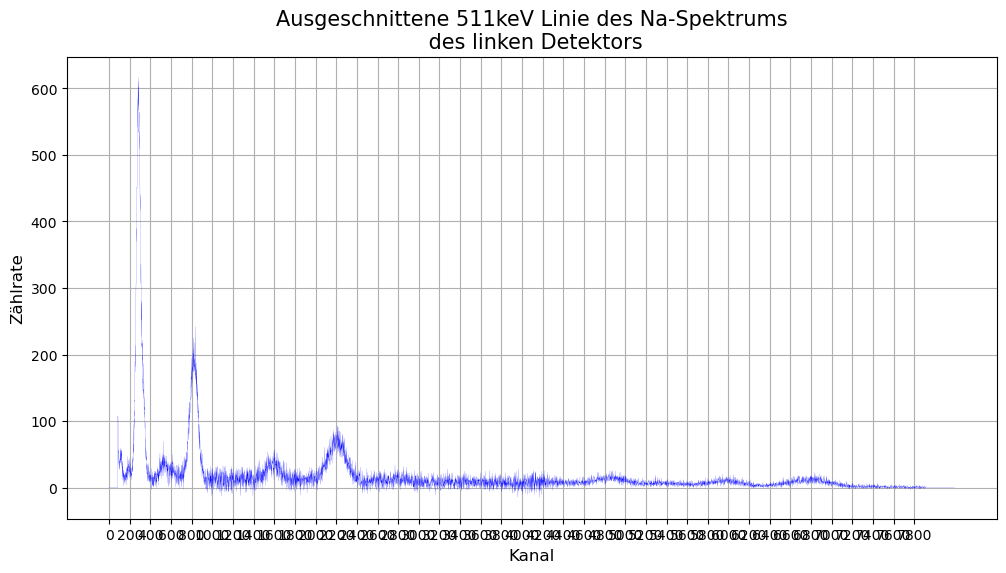

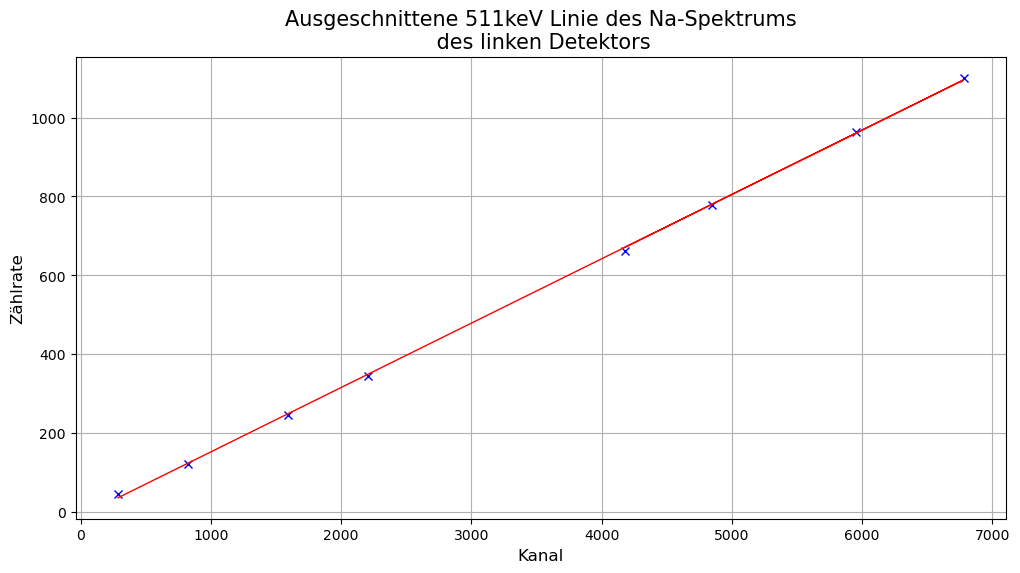

In [55]:
names=glob.glob(path2+'Eu*.txt')
print(names)
data=np.loadtxt(names[1])
databg=np.loadtxt(names[0])
k=data[:,0]
kb=databg[:,0]
I=data[:,1]
Ibg=databg[:,1]
I2=I-Ibg
#,450,650
# ranges=[150,400,600,1000,1400,1800,1900,2500,4500,5200,5600,6300,6300,7600]
ranges=[150,400,600,1000,1400,1800,1900,2500,4600,5100,5700,6250,6450,7130]
E_list=[45.7,121.8,244.7,344.3,778.9,964.1,1100.9,661.7]
rel=[28.53,7.55,27.57,13.44,14.65,25.70]
rel2=[28.53,27.57,13.44,14.65,25.70]
count=int(len(ranges)/2)
zeros=np.zeros(len(k))
all=np.sum(I-Ibg)
III=[]
params=[]
params_stderr=[]
bestfits=[]
for i in range(0,7):
    mask=((k>ranges[2*i]) & (k<ranges[2*i+1]))
    antimaskdown=((k<=ranges[2*i]))
    antimaskup=((k>=ranges[2*i+1]))
    x_=k
    III.append(x_[mask])
    y_=np.concatenate((zeros[antimaskdown],I2[mask],zeros[antimaskup]))
    # print(len(x_))
    # print(len(y_))
    center=(ranges[2*i]+ranges[2*i+1])/2
    if i==7:
        a1,a2,a3=Gausfit_2(x_,y_,4000,center,200)
    else:
        # a1,a2,a3=Gausfit_11(x_,y_,4000,center,200)
        a1,a2,a3=Gausfit_11(x_[mask],I2[mask],4000,center,200)
    params.append(a1)
    params_stderr.append(a2)
    bestfits.append(a3)
data2=np.loadtxt('../Versuch 526/Rohdaten/CsSpektrum.txt')
Xcs=data2[:,0]
Ycs=data2[:,1]
mask2=(Xcs>3600)
X=Xcs[mask2]
Y=Ycs[mask2]
lbl,lbl2,lbl3=Gausfit_11(X,Y,4000,4000,200)
    
mask3=(x_>700)
all2=np.sum(I2[mask3])
# Plot_raw(k,kb,I,Ibg,'lbl',path_raw,0)
figure=plt.figure(figsize=(12,6))
plt.title('Ausgeschnittene 511keV Linie des Na-Spektrums\n des linken Detektors',fontsize=15)
plt.plot(x_,I2,"b",linewidth=0.1)
plt.plot(X,lbl3,"orange")
for i in range(0,7):
    # plt.plot(x_,bestfits[i],'r')
    plt.plot(III[i],bestfits[i],'r')
    print(params[i])
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.xticks(np.arange(0, 8000, 200))
plt.grid()

figure=plt.figure(figsize=(12,6))
plt.title('Ausgeschnittene 511keV Linie des Na-Spektrums\n des linken Detektors',fontsize=15)
plt.plot(x_,I2,"b",linewidth=0.1)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.xticks(np.arange(0, 8000, 200))
plt.grid()
centers=[]
for i in range(0,7):
    centers.append(params[i][1])
# centers.append(params[2][4])
centers.append(lbl[1])
print(centers)
print(params)
# fit=Gradenfit(centers,E_list)
fit=Fit(centers,E_list,E_kal)
figure=plt.figure(figsize=(12,6))
plt.title('Ausgeschnittene 511keV Linie des Na-Spektrums\n des linken Detektors',fontsize=15)
plt.plot(centers,E_list,"b x",linewidth=1)
plt.plot(centers,fit,"r-",linewidth=1)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.grid()

1
3
4
5
6
[122.56776304937796, 348.60273000693684, 781.0038254911095, 962.0386673906646, 1096.3728029017218]
[20160.634712429568, 18329.842153504513, 7553.64057014588, 5391.996081134263, 6632.153546114488]
[1.0, 0.9408481382122429, 0.7953432833555656, 0.5208462169094099, 0.3651901203782896]
Durch die Anpassung bestimmte Parameter: [1.04199655e+00 2.01099291e-02 2.78948422e-03 1.72369140e+02] +/- [1.14332036e-01 7.58132689e+04 1.47280826e-03 1.35148316e+09] nm


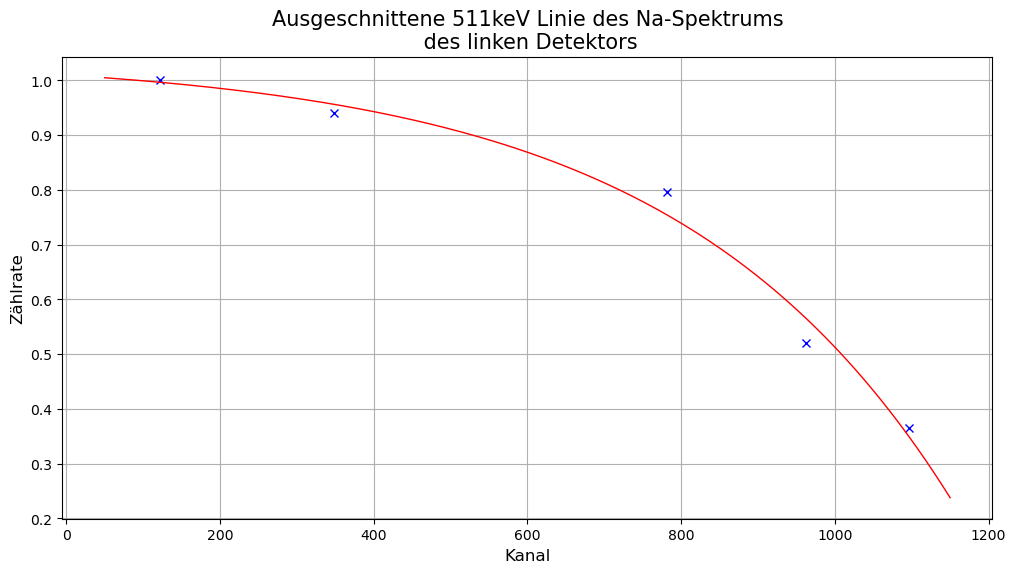

In [93]:
amplidudes=[]
centers=[]
resp=[]
para=[]
for i in range(1,7):
    if i!=2:
        para.append(params[i])
        print(i)
for i in range(0,5):
    amplidudes.append(para[i][0])
    centers.append(0.16341508*para[i][1]-11.45483454)
    resp.append(amplidudes[i]*rel2[0]/(amplidudes[0]*rel2[i]))
# centers.append(0.16341508*params[2][4]-11.45483454)
# amplidudes.append(params[2][3])
# resp.append(amplidudes[7]*rel[7]/(amplidudes[0]*rel[6]))
print(centers)
print(amplidudes)
print(resp)
S=[1.0131286,0.01878647,0.00324241,8.34148682]
x_smooth=np.linspace(50,1150,num=200)
fit=Fit_smooth(centers,resp,x_smooth,S,Effizienz)
figure=plt.figure(figsize=(12,6))
plt.title('Ausgeschnittene 511keV Linie des Na-Spektrums\n des linken Detektors',fontsize=15)
plt.plot(centers,resp,"b x",linewidth=1)
plt.plot(x_smooth,fit,"r-",linewidth=1)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.grid()

c:\Users\Banton\anaconda3\Lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


[122.56776304937796, 248.08033214522058, 348.60273000693684, 781.0038254911095, 962.0386673906646, 1096.3728029017218]
[20160.634712429568, 9419.710813624431, 18329.842153504513, 7553.64057014588, 5391.996081134263, 6632.153546114488]
[1.0, 1.7655832065251178, 0.9408481382122429, 0.7953432833555656, 0.5208462169094099, 0.3651901203782896]
Durch die Anpassung bestimmte Parameter: [0.00396865 0.00470707] +/- [0.02565292 0.00610866] nm


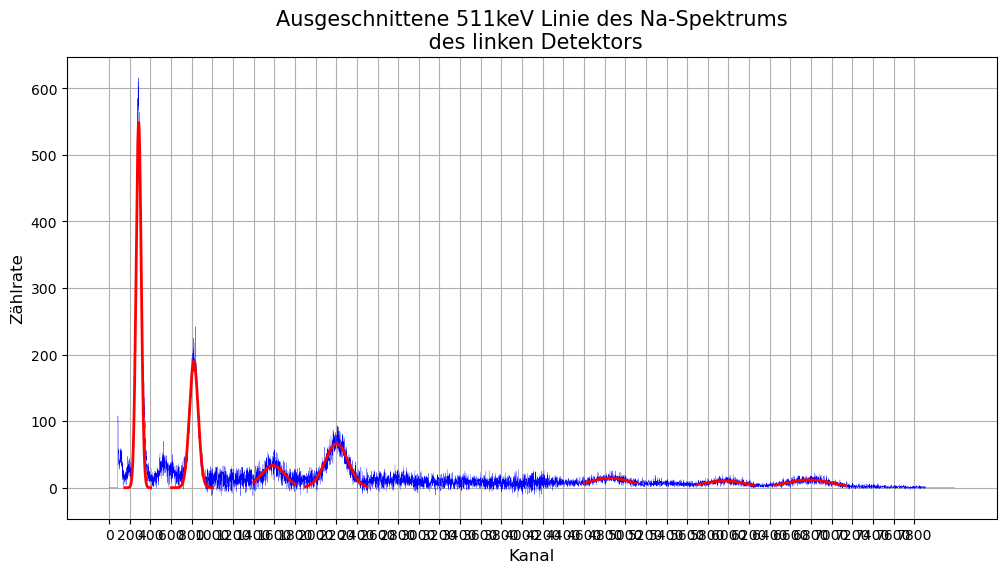

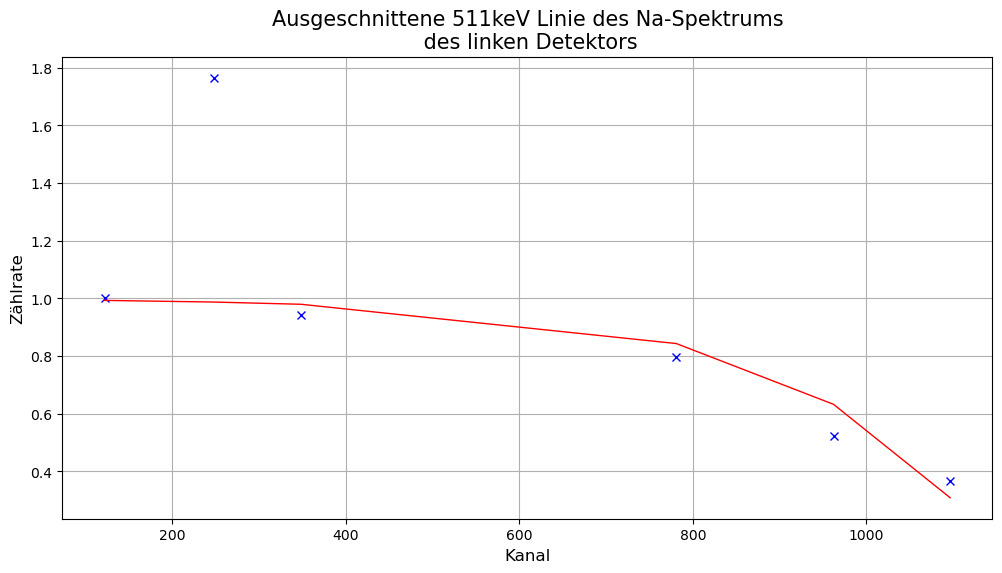

In [77]:
III=[]
params=[]

params_stderr=[]
bestfits=[]
for i in range(0,7):
    mask=((k>ranges[2*i]) & (k<ranges[2*i+1]))
    antimaskdown=((k<=ranges[2*i]))
    antimaskup=((k>=ranges[2*i+1]))
    x_=k
    III.append(x_[mask])
    y_=np.concatenate((zeros[antimaskdown],I2[mask],zeros[antimaskup]))
    # print(len(x_))
    # print(len(y_))
    center=(ranges[2*i]+ranges[2*i+1])/2
    if i==7:
        a1,a2,a3=Gausfit_2(x_,y_,4000,center,200)
    else:
        # a1,a2,a3=Gausfit_11(x_,y_,4000,center,200)
        a1,a2,a3=Gausfit_11(x_[mask],I2[mask],4000,center,200)
    params.append(a1)
    params_stderr.append(a2)
    bestfits.append(a3)
data2=np.loadtxt('../Versuch 526/Rohdaten/CsSpektrum.txt')
Xcs=data2[:,0]
Ycs=data2[:,1]
mask2=(Xcs>3600)
X=Xcs[mask2]
Y=Ycs[mask2]
lbl,lbl2,lbl3=Gausfit_11(X,Y,4000,4000,200)
    
mask3=(x_>700)
all2=np.sum(I2[mask3])
# Plot_raw(k,kb,I,Ibg,'lbl',path_raw,0)
figure=plt.figure(figsize=(12,6))
plt.title('Ausgeschnittene 511keV Linie des Na-Spektrums\n des linken Detektors',fontsize=15)
plt.plot(x_,I2,"b",linewidth=0.2)
for i in range(0,7):
    # plt.plot(x_,bestfits[i],'r')
    plt.plot(III[i],bestfits[i],'r',linewidth=2)
    #print(params[i])
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.xticks(np.arange(0, 8000, 200))
plt.grid()

amplidudes=[]
centers=[]
resp=[]
for i in range(1,7):
    amplidudes.append(params[i][0])
    centers.append(0.16341508*params[i][1]-11.45483454)
    resp.append(amplidudes[i-1]*rel[0]/(amplidudes[0]*rel[i-1]))
# centers.append(0.16341508*params[2][4]-11.45483454)
# amplidudes.append(params[2][3])
# resp.append(amplidudes[7]*rel[7]/(amplidudes[0]*rel[6]))
print(centers)
print(amplidudes)
print(resp)
S=[0.002,0.0137]
fit=Fit(centers,resp,S,Effizienz)
figure=plt.figure(figsize=(12,6))
plt.title('Ausgeschnittene 511keV Linie des Na-Spektrums\n des linken Detektors',fontsize=15)
plt.plot(centers,resp,"b x",linewidth=1)
plt.plot(centers,fit,"r-",linewidth=1)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.grid()

['../Versuch 526/Rohdaten\\Cs10,18mm.txt', '../Versuch 526/Rohdaten\\Cs1mm.txt', '../Versuch 526/Rohdaten\\Cs20,2mm.txt', '../Versuch 526/Rohdaten\\Cs5,06mm.txt', '../Versuch 526/Rohdaten\\CsHintergrundTot.txt', '../Versuch 526/Rohdaten\\CsSpektrum.txt']
../Versuch 526/Rohdaten\Cs10,18mm.txt
../Versuch 526/Rohdaten\Cs1mm.txt
../Versuch 526/Rohdaten\Cs20,2mm.txt
../Versuch 526/Rohdaten\Cs5,06mm.txt
../Versuch 526/Rohdaten\CsHintergrundTot.txt
../Versuch 526/Rohdaten\CsSpektrum.txt
[230023.4197538401, 4158.815172345902, 122.28895167337767, 287.9684691795032, 750.4036208893261]
[275091.411086259, 4167.507525308496, 122.24107308931048, 287.85572373217013, 897.7800789495402]
[190454.63255148087, 4157.953816291156, 122.27054809381127, 287.9251320622687, 621.412190754614]
[254952.69780443373, 4162.736563440771, 122.3642081343949, 288.1456845990358, 831.2186807239761]
[280371.3698517352, 4172.141779917767, 122.0033758200998, 287.29598944868746, 916.7942968048144]
[230023.4197538401, 275091.411

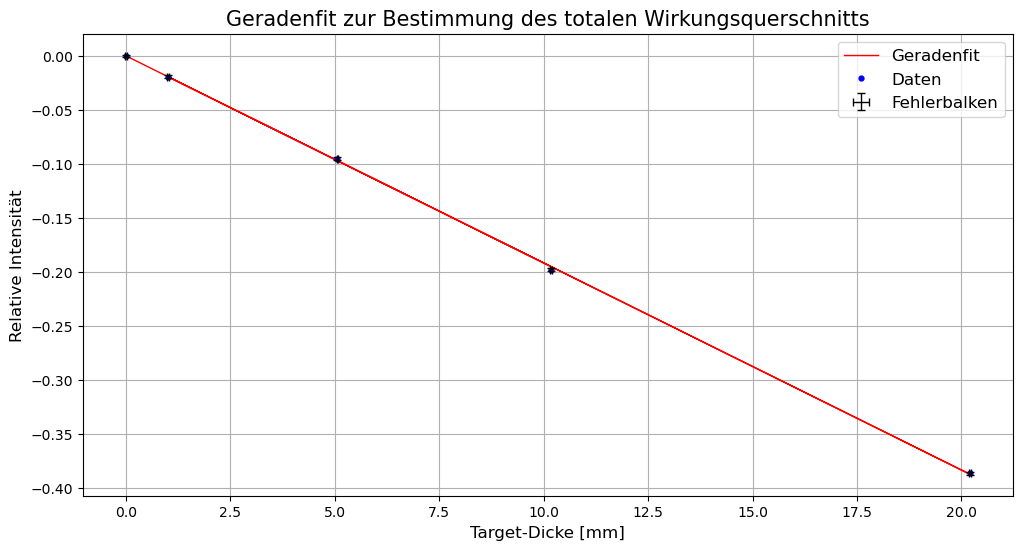

In [6]:
def Gausfit_1(x,y,namena,amplitude,center,sigma,dont_show):
    x1 = x
    y1 = y
    model = (GaussianModel(prefix='g1_'))
    params = model.make_params(g1_amplitude=amplitude,
                            g1_center=center,
                            g1_sigma=sigma)
    result = model.fit(y1, params, x=x1)
    # print(result.fit_report(min_correl=0.5))
    lolo1=[]
    lala1=[]
    for name,param in result.params.items():
        if result.errorbars==True:
            lala1.append(param.stderr)
        else:
            lala1.append(0)
        lolo1.append(param.value)
    comps = result.eval_components(x=x1)
    dely = result.eval_uncertainty(sigma=3)
    ergebnis = model.eval(params,x=x1)
    figure=plt.figure(figsize=(6,6))
    plt.title('Gaußkurvenfit an das Cäsiumspektrum ohne Target',fontsize=15)
    plt.plot(x1,y1,"b-",linewidth=.2,label="Messwerte",)
    plt.plot(chanel,count,"b-",linewidth=.2)
    plt.plot(x1,result.best_fit,"r-",label="Gaußkurve",)
    plt.xlabel('Kanal',fontsize=12)
    plt.ylabel('Zählrate',fontsize=12)
    plt.grid()
    plt.legend(fontsize=12)
    #plt.savefig(namena+'.png')
    if (dont_show==1):
        plt.close(figure)
    #plt.show
    return lolo1,lala1
parameter=[]
parameter_err=[]

allfiles=glob.glob(path1+'*.txt')
print(allfiles)
chanel=[]
count=[]
x_=[]
y_=[]
i=0
for h in allfiles:
    data=np.loadtxt(h)
    chanel.append(data[:,0])
    count.append(data[:,1])
    mask=((chanel[i]>3600))
    x_.append(chanel[i][mask])
    y_.append(count[i][mask])
    i=i+1
    print(h)
    
a,b=Gausfit_1(x_[0],y_[0],'Cs1mm',480,4200,100,1)
parameter.append(a)
parameter_err.append(b)
a,b=Gausfit_1(x_[1],y_[1],'Cs5,06',480,4200,100,1)
parameter.append(a)
parameter_err.append(b)
a,b=Gausfit_1(x_[2],y_[2],'Cs10,18mm',480,4200,100,1)
parameter.append(a)
parameter_err.append(b)
a,b=Gausfit_1(x_[3],y_[3],'Cs20,2mm',480,4200,100,1)
parameter.append(a)
parameter_err.append(b)
a,b=Gausfit_1(x_[4],y_[4],'dd',480,4200,100,1)
parameter.append(a)
parameter_err.append(b)

for h in parameter: 
    print(h)
#print(parameter_err)


f=[]
ferr=[]
g=[]
gerr=[]
haha=[10.18,1,20.2,5.06,0]
hahaerr=[0.02,0.02,0.02,0.02,0.02]
gerr=[]
for h in parameter:
    f.append(h[0])
for h in parameter_err:
    ferr.append(h[0])
print(f)
print(ferr)
for h in f:
    x=np.log(h/f[4])
    g.append(x)
i=0
for h in ferr:
    x=np.sqrt((h/f[i])**2+(ferr[4]/f[4])**2)
    gerr.append(x)
    i=i+1
print(haha)
print(g)
print(gerr)


anpassungs_werte, co_var = curve_fit(E_kal,haha,g)
perr= np.sqrt(np.diag(co_var))
print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr)
Rfit=[]
for E in haha:
    Rfit.append(E_kal(E, *anpassungs_werte))

plt.figure(figsize=(12,6))
plt.title('Geradenfit zur Bestimmung des totalen Wirkungsquerschnitts',fontsize=15)
plt.plot(haha,Rfit,"r-",linewidth=1,label='Geradenfit')
plt.plot(haha,g,"b.",markersize=7,label="Daten",)
plt.errorbar(haha,g,gerr,hahaerr,'k.',capsize=3,elinewidth=1,markersize=0,label='Fehlerbalken')
#plt.plot(x1,result.best_fit,"r-",label="Gaußkurve",)
plt.xlabel('Target-Dicke [mm]',fontsize=12)
plt.ylabel('Relative Intensität',fontsize=12)
plt.grid()
plt.legend(fontsize=12)
#plt.savefig(Wirkungsquerschnitt'.png')


